In [1]:
import pandas as pd
import json
import requests
import glob
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')

In [2]:
house = pd.concat([pd.read_csv(f) for f in glob.glob(r"D:\My files\Nagammai\Guvi\MDE86\code\Singapore\*.csv")], ignore_index=True)

In [3]:
house

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
924442,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
924443,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
924444,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
924445,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


In [4]:
# checking dataset shape
house.shape

(924447, 11)

In [5]:
# checking the datatypes
house.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [6]:
# checking the null values in dataset
house.isnull().sum() 

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924447 entries, 0 to 924446
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                924447 non-null  object 
 1   town                 924447 non-null  object 
 2   flat_type            924447 non-null  object 
 3   block                924447 non-null  object 
 4   street_name          924447 non-null  object 
 5   storey_range         924447 non-null  object 
 6   floor_area_sqm       924447 non-null  float64
 7   flat_model           924447 non-null  object 
 8   lease_commence_date  924447 non-null  int64  
 9   resale_price         924447 non-null  float64
 10  remaining_lease      215397 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.6+ MB


In [8]:
#descriptive statistics analaysis

house.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,924447.0,95.692743,25.829751,28.0,73.0,93.0,113.0,307.0
lease_commence_date,924447.0,1988.247593,10.633223,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,924447.0,319928.622033,169707.181418,5000.0,193000.0,296000.0,416000.0,1568888.0


In [9]:
# checking the unique values in flat_type feature
house['flat_type'].value_counts()

flat_type
4 ROOM              351218
3 ROOM              295287
5 ROOM              194845
EXECUTIVE            69489
2 ROOM               11762
1 ROOM                1303
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [10]:
# checking the unique values in town feature
house['town'].value_counts()

town
TAMPINES           79775
YISHUN             69906
JURONG WEST        66519
BEDOK              66510
WOODLANDS          65361
ANG MO KIO         51975
HOUGANG            50606
BUKIT BATOK        44239
CHOA CHU KANG      38183
BUKIT MERAH        34264
PASIR RIS          33148
SENGKANG           32284
TOA PAYOH          31458
QUEENSTOWN         28707
GEYLANG            28112
CLEMENTI           27983
BUKIT PANJANG      27620
KALLANG/WHAMPOA    27093
JURONG EAST        24719
SERANGOON          22786
BISHAN             21228
PUNGGOL            20470
SEMBAWANG          13771
MARINE PARADE       8019
CENTRAL AREA        7133
BUKIT TIMAH         2514
LIM CHU KANG          64
Name: count, dtype: int64

In [11]:
house['storey_range'].value_counts()

storey_range
04 TO 06    232022
07 TO 09    209590
01 TO 03    185927
10 TO 12    178355
13 TO 15     61749
16 TO 18     24050
19 TO 21     11379
22 TO 24      7413
25 TO 27      3420
01 TO 05      2700
06 TO 10      2474
28 TO 30      1629
11 TO 15      1259
31 TO 33       622
34 TO 36       573
37 TO 39       505
16 TO 20       265
40 TO 42       244
21 TO 25        92
43 TO 45        64
46 TO 48        50
26 TO 30        39
49 TO 51        17
36 TO 40         7
31 TO 35         2
Name: count, dtype: int64

In [12]:
house['flat_model'].value_counts()

flat_model
Model A                   193686
Improved                  167601
New Generation            109769
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46529
Simplified                 34200
Apartment                  25483
Standard                   25103
SIMPLIFIED                 23258
Maisonette                 17385
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10112
APARTMENT                   9901
DBSS                        3279
Adjoined flat               1245
Model A-Maisonette          1091
MODEL A-MAISONETTE           982
Terrace                      445
Type S1                      434
MULTI GENERATION             279
Multi Generation             264
TERRACE                      247
Type S2                      216
Premium Apartment Loft       108
2-room                       106
Premium Maisonette            86
Improved-Maisonette           81

In [13]:
house.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [14]:
# Convert the 'month' column to a datetime format
house['month'] = pd.to_datetime(house['month'])

# Extract the year and month into separate columns
house['year'] = house['month'].dt.year
house['month_of_year'] = house['month'].dt.month
house

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,1
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,1
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,1
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,1
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924442,2014-12-01,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN,2014,12
924443,2014-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN,2014,12
924444,2014-12-01,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN,2014,12
924445,2014-12-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN,2014,12


In [15]:
house.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
remaining_lease                object
year                            int32
month_of_year                   int32
dtype: object

In [16]:
house['lease_commence_year'] = pd.to_datetime(house['lease_commence_date'],format = '%Y').dt.year
# Extract the year of lease commencement
#house['lease_commence_year'] = house['lease_commence_date'].dt.year

In [17]:
house

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year,lease_commence_year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,1,1977
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,1,1977
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,1,1977
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,1,1977
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,1,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924442,2014-12-01,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN,2014,12,1988
924443,2014-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN,2014,12,1988
924444,2014-12-01,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN,2014,12,1992
924445,2014-12-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN,2014,12,1985


In [18]:
house.dtypes 

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
remaining_lease                object
year                            int32
month_of_year                   int32
lease_commence_year             int32
dtype: object

In [19]:
# Extract the remaining_lease feature

data = house['remaining_lease']
house_new = pd.DataFrame(data)

# Extract years and months using regular expressions
lease_info = house['remaining_lease'].str.extract(r'(\d+) years (\d+) months')
lease_info.columns = ['years', 'months']

# Convert to numeric values
house['remaining_lease_years'] = pd.to_numeric(lease_info['years'])
house['remaining_lease_months'] = pd.to_numeric(lease_info['months'])

In [20]:
house_new_data = house.copy()

In [21]:
house_new_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,1,1977,NaN,NaN
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,1,1977,NaN,NaN
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,1,1977,NaN,NaN
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,1,1977,NaN,NaN
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,1,1976,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924442,2014-12-01,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN,2014,12,1988,NaN,NaN
924443,2014-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN,2014,12,1988,NaN,NaN
924444,2014-12-01,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN,2014,12,1992,NaN,NaN
924445,2014-12-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN,2014,12,1985,NaN,NaN


In [22]:
house_new_data.isnull().sum()

month                          0
town                           0
flat_type                      0
block                          0
street_name                    0
storey_range                   0
floor_area_sqm                 0
flat_model                     0
lease_commence_date            0
resale_price                   0
remaining_lease           709050
year                           0
month_of_year                  0
lease_commence_year            0
remaining_lease_years     775338
remaining_lease_months    775338
dtype: int64

In [23]:
# handleing the null values using mean method
house_new_data['remaining_lease_years'].fillna(house['remaining_lease_years'].mean(),inplace = True)
house_new_data['remaining_lease_months'].fillna(house['remaining_lease_months'].mean(),inplace = True)
house_new_data.isnull().sum()

month                          0
town                           0
flat_type                      0
block                          0
street_name                    0
storey_range                   0
floor_area_sqm                 0
flat_model                     0
lease_commence_date            0
resale_price                   0
remaining_lease           709050
year                           0
month_of_year                  0
lease_commence_year            0
remaining_lease_years          0
remaining_lease_months         0
dtype: int64

In [24]:
#  dropping the existing features 

house_new_data.drop(columns=['month','lease_commence_date','remaining_lease'],inplace = True)

In [25]:
house_new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,9000.0,1990,1,1977,74.068353,6.533241
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,6000.0,1990,1,1977,74.068353,6.533241
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,8000.0,1990,1,1977,74.068353,6.533241
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,6000.0,1990,1,1977,74.068353,6.533241
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,47200.0,1990,1,1976,74.068353,6.533241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924442,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,580000.0,2014,12,1988,74.068353,6.533241
924443,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,540000.0,2014,12,1988,74.068353,6.533241
924444,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,738000.0,2014,12,1992,74.068353,6.533241
924445,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,592000.0,2014,12,1985,74.068353,6.533241


In [26]:
#DATA PROCESSING

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder = LabelEncoder()
house_new_data['town'] = encoder.fit_transform(house_new_data['town'])
house_new_data['flat_type'] = encoder.fit_transform(house_new_data['flat_type'])
house_new_data['storey_range'] = encoder.fit_transform(house_new_data['storey_range'])
house_new_data['flat_model'] = encoder.fit_transform(house_new_data['flat_model'])

In [29]:
house_new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,0,309,ANG MO KIO AVE 1,5,31.0,7,9000.0,1990,1,1977,74.068353,6.533241
1,0,0,309,ANG MO KIO AVE 1,2,31.0,7,6000.0,1990,1,1977,74.068353,6.533241
2,0,0,309,ANG MO KIO AVE 1,5,31.0,7,8000.0,1990,1,1977,74.068353,6.533241
3,0,0,309,ANG MO KIO AVE 1,4,31.0,7,6000.0,1990,1,1977,74.068353,6.533241
4,0,2,216,ANG MO KIO AVE 1,2,73.0,20,47200.0,1990,1,1976,74.068353,6.533241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924442,26,4,816,YISHUN ST 81,5,122.0,9,580000.0,2014,12,1988,74.068353,6.533241
924443,26,5,325,YISHUN CTRL,5,146.0,15,540000.0,2014,12,1988,74.068353,6.533241
924444,26,5,618,YISHUN RING RD,4,164.0,5,738000.0,2014,12,1992,74.068353,6.533241
924445,26,5,277,YISHUN ST 22,4,152.0,15,592000.0,2014,12,1985,74.068353,6.533241


In [30]:
# after encoding descriptive statistics analaysis

house_new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
town,924447.0,13.651810,8.796869,0.0,5.000000,13.000000,23.000000,26.0
flat_type,924447.0,3.014058,0.949489,0.0,2.000000,3.000000,4.000000,7.0
storey_range,924447.0,3.408205,2.662289,0.0,2.000000,4.000000,5.000000,24.0
floor_area_sqm,924447.0,95.692743,25.829751,28.0,73.000000,93.000000,113.000000,307.0
flat_model,924447.0,15.714647,6.669628,0.0,9.000000,16.000000,21.000000,33.0
resale_price,924447.0,319928.622033,169707.181418,5000.0,193000.000000,296000.000000,416000.000000,1568888.0
year,924447.0,2006.116195,9.284090,1990.0,1999.000000,2005.000000,2014.000000,2024.0
month_of_year,924447.0,6.555171,3.417559,1.0,4.000000,7.000000,10.000000,12.0
lease_commence_year,924447.0,1988.247593,10.633223,1966.0,1981.000000,1986.000000,1996.000000,2022.0
remaining_lease_years,924447.0,74.068353,5.583622,41.0,74.068353,74.068353,74.068353,97.0


In [31]:
# checking the outliars using boxplot distribution plot

def plot(house_new_data,column):
    plt.figure(figsize =(15,6))
    plt.subplot(1,3,1)
    sns.boxplot(data = house_new_data ,x = column)
    plt.title(f'box plot for {column}')
    

    plt.subplot(1,3,2)
    sns.histplot(data = house_new_data ,x = column,kde = True ,bins = 40)
    plt.title(f'distribution  plot for {column}')
    plt.show()

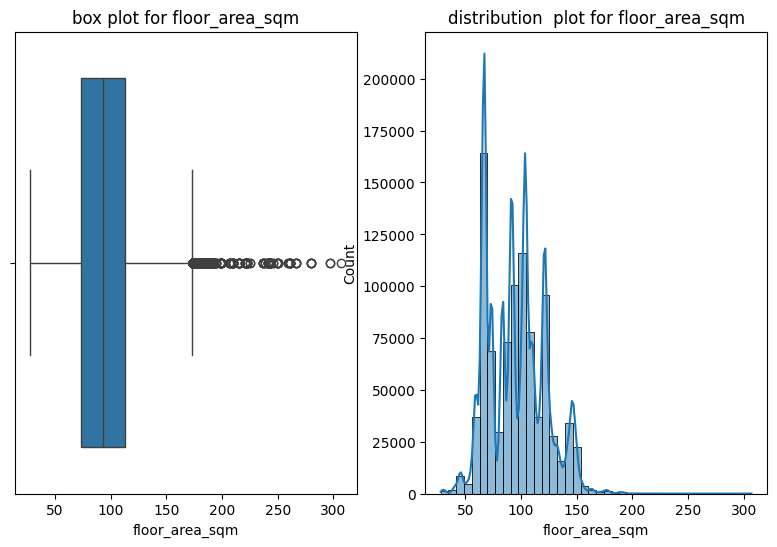

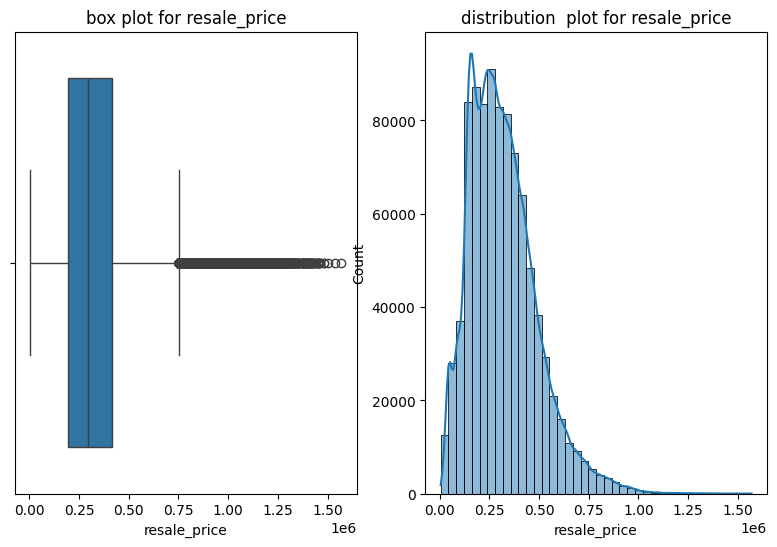

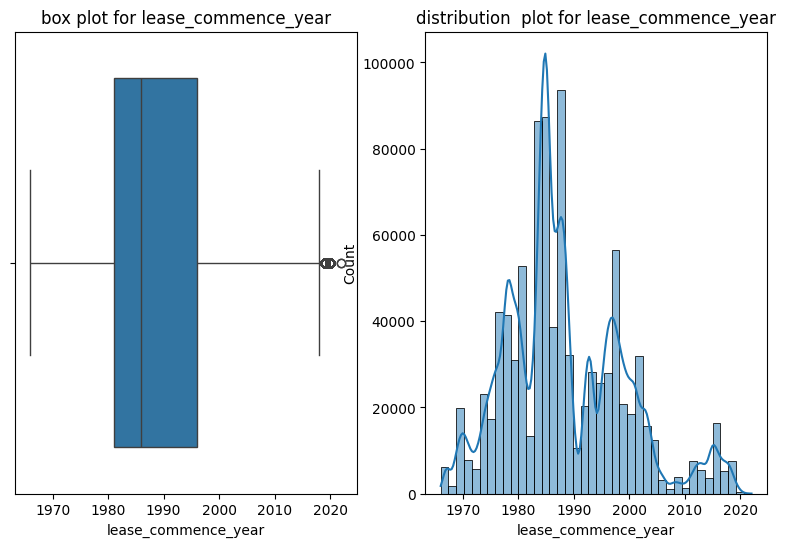

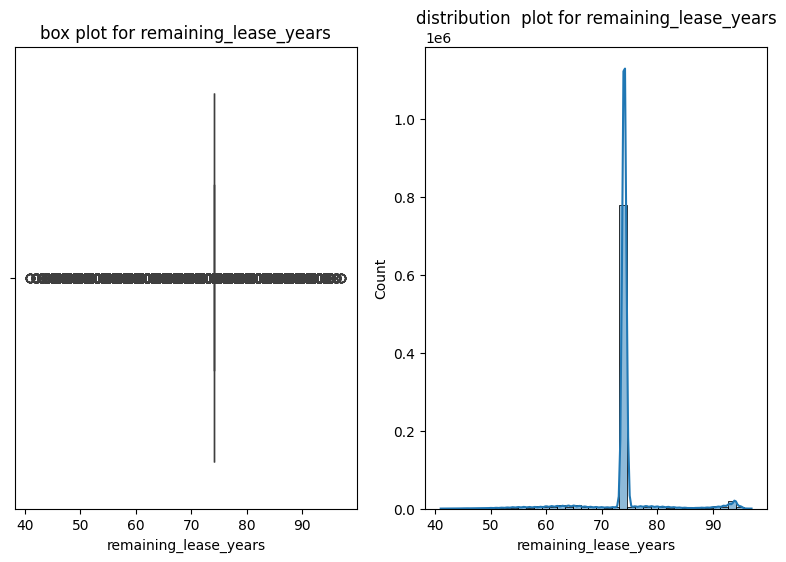

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in ['floor_area_sqm','resale_price','lease_commence_year','remaining_lease_years']:
    plot(house_new_data ,i)

In [37]:
# 'floor_area_sqm','resale_price' this two feature are skewd in data handling log method 


house_new_data['floor_area_sqm'] = np.log(house_new_data['floor_area_sqm'])
house_new_data['resale_price'] = np.log(house_new_data['resale_price'])
house_new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,0,309,ANG MO KIO AVE 1,5,3.433987,7,9.104980,1990,1,1977,74.068353,6.533241
1,0,0,309,ANG MO KIO AVE 1,2,3.433987,7,8.699515,1990,1,1977,74.068353,6.533241
2,0,0,309,ANG MO KIO AVE 1,5,3.433987,7,8.987197,1990,1,1977,74.068353,6.533241
3,0,0,309,ANG MO KIO AVE 1,4,3.433987,7,8.699515,1990,1,1977,74.068353,6.533241
4,0,2,216,ANG MO KIO AVE 1,2,4.290459,20,10.762149,1990,1,1976,74.068353,6.533241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924442,26,4,816,YISHUN ST 81,5,4.804021,9,13.270783,2014,12,1988,74.068353,6.533241
924443,26,5,325,YISHUN CTRL,5,4.983607,15,13.199324,2014,12,1988,74.068353,6.533241
924444,26,5,618,YISHUN RING RD,4,5.099866,5,13.511699,2014,12,1992,74.068353,6.533241
924445,26,5,277,YISHUN ST 22,4,5.023881,15,13.291262,2014,12,1985,74.068353,6.533241


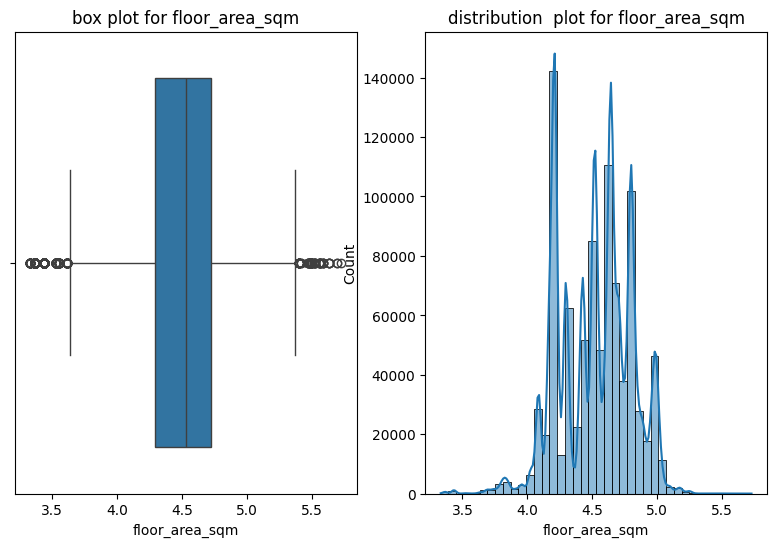

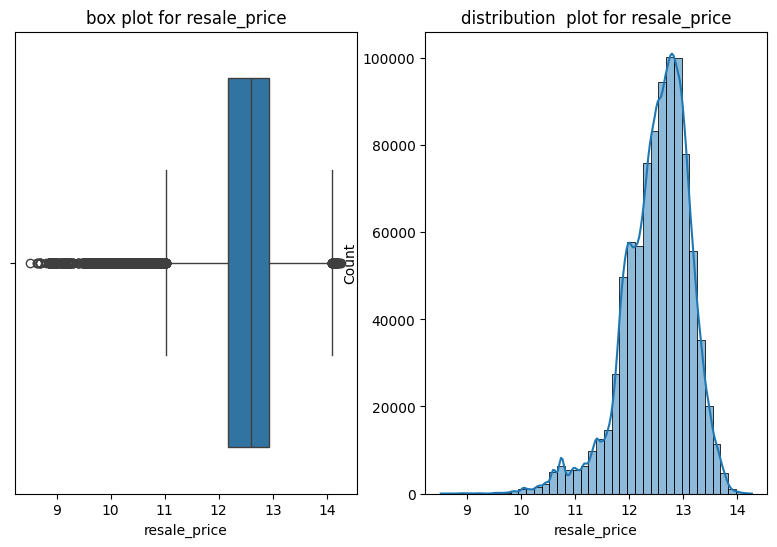

In [38]:
for i in ['floor_area_sqm','resale_price']:
    plot(house_new_data,i)

In [39]:
#using the IQR & Clips  method removing the outliars :
# formula IQR = Q3_Q1
def outlier(house_new_data ,column):
    IQR = house_new_data[column].quantile(0.75)-house_new_data[column].quantile(0.25)
    upper_value = house_new_data[column].quantile(0.75)+1.5*IQR
    lower_value = house_new_data[column].quantile(0.25)-1.5*IQR
    
    house_new_data[column] =     house_new_data[column].clip(upper_value,lower_value)

outlier(house_new_data, 'floor_area_sqm')
outlier(house_new_data, 'resale_price')
house_new_data1 = house_new_data.copy()

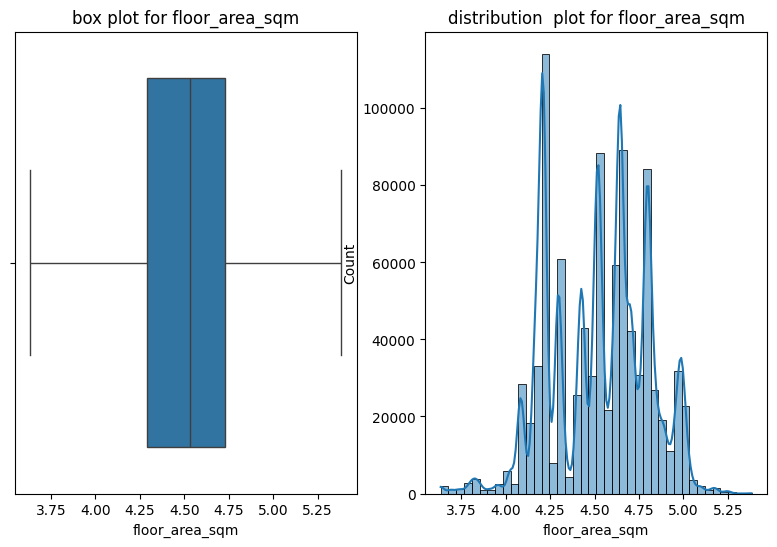

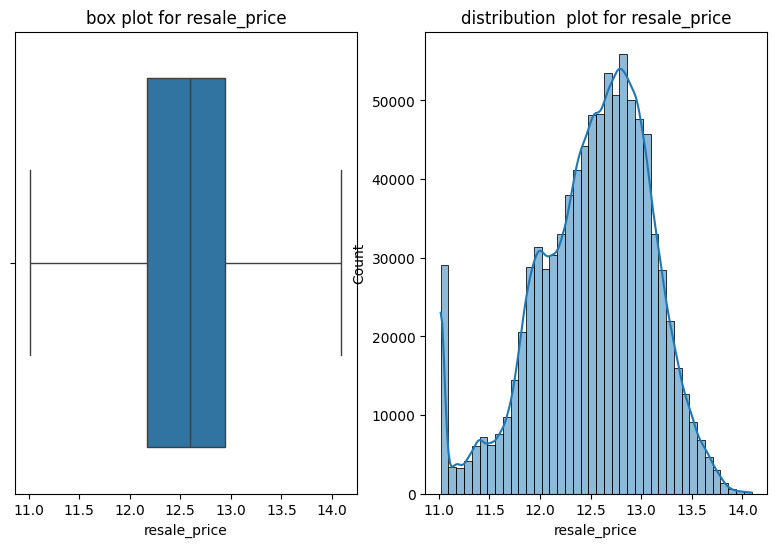

In [40]:
# after IQR using checking the skewness
for i in ['floor_area_sqm','resale_price']:
    plot(house_new_data1,i)

<Axes: xlabel='resale_price', ylabel='flat_model'>

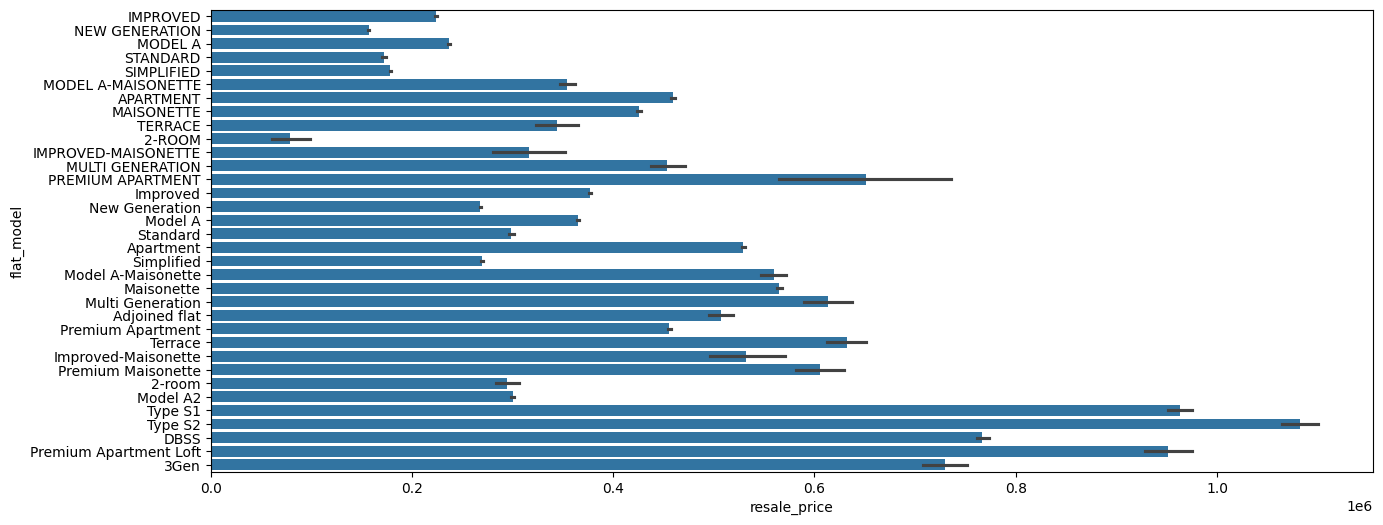

In [41]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'flat_model', x= 'resale_price',data = house )

<Axes: xlabel='resale_price', ylabel='town'>

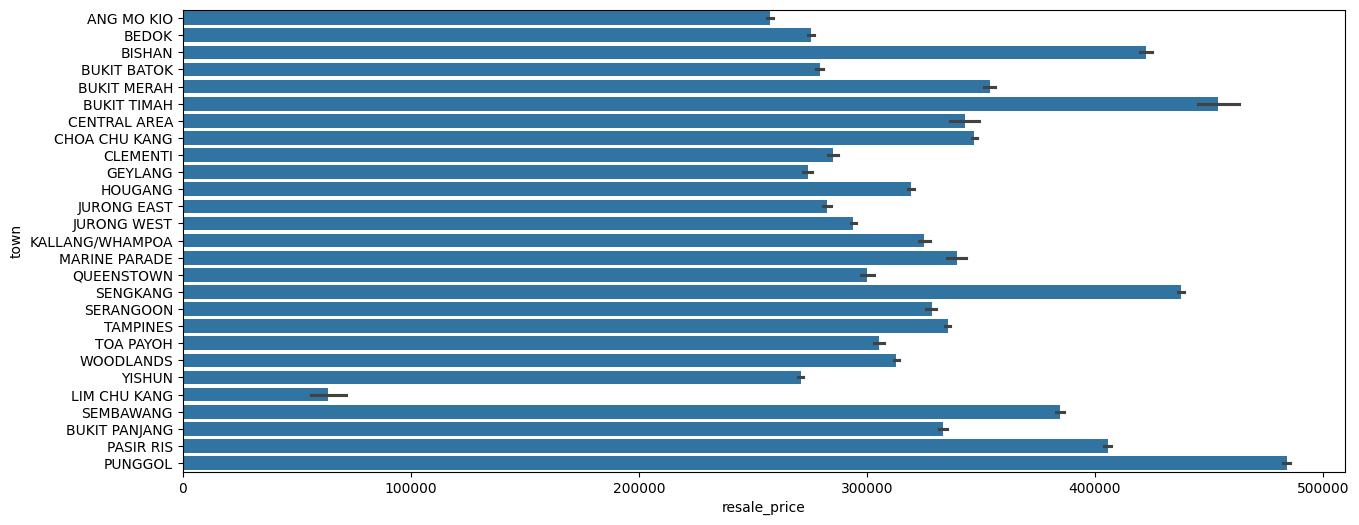

In [42]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'town', x= 'resale_price',data = house )

<Axes: xlabel='resale_price', ylabel='flat_type'>

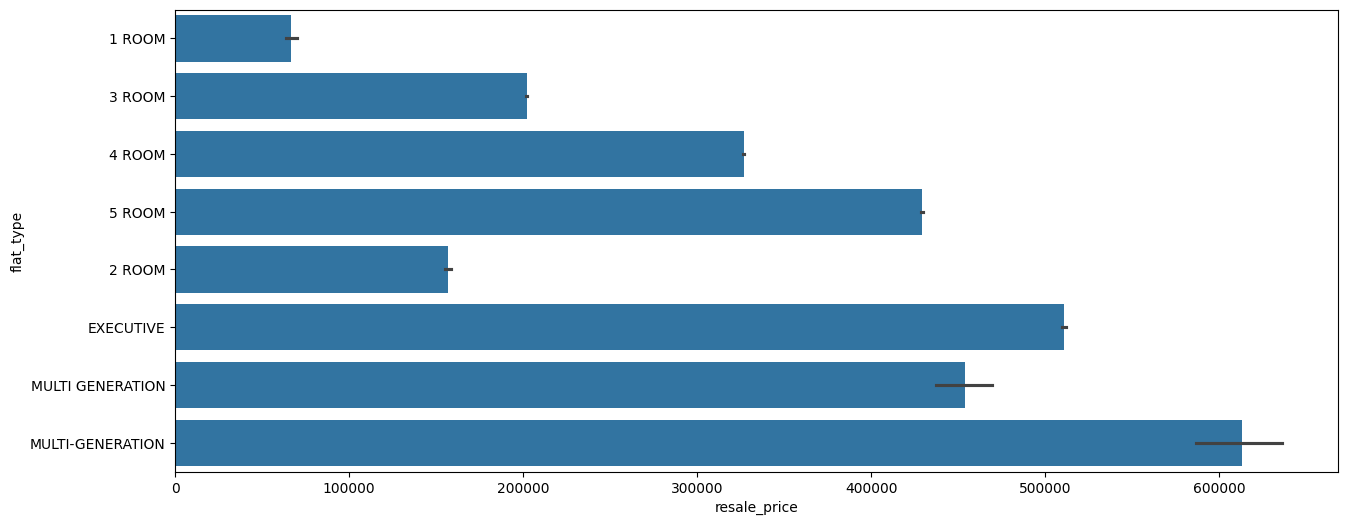

In [43]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'flat_type', x= 'resale_price',data = house )

<Axes: xlabel='resale_price', ylabel='floor_area_sqm'>

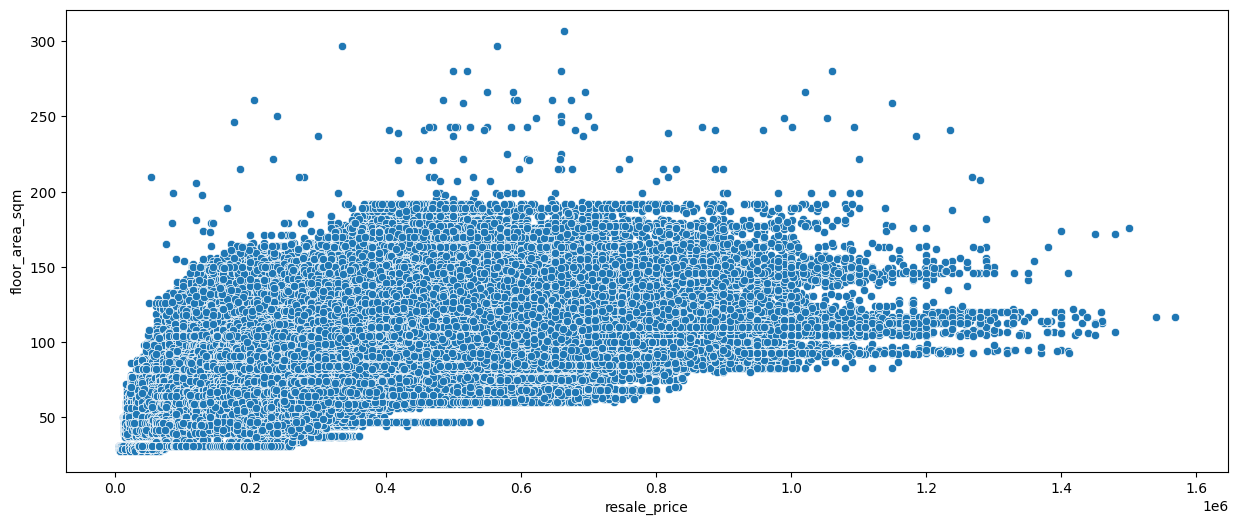

In [44]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'resale_price' ,y = 'floor_area_sqm',data = house)

<Axes: xlabel='lease_commence_year', ylabel='resale_price'>

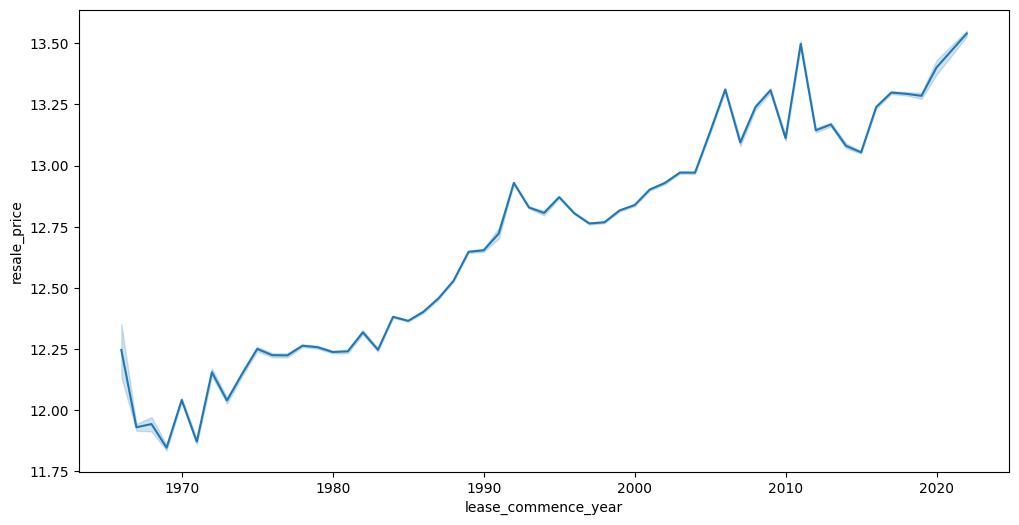

In [45]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'lease_commence_year' , y = 'resale_price', data = house_new_data)

<Axes: xlabel='year', ylabel='resale_price'>

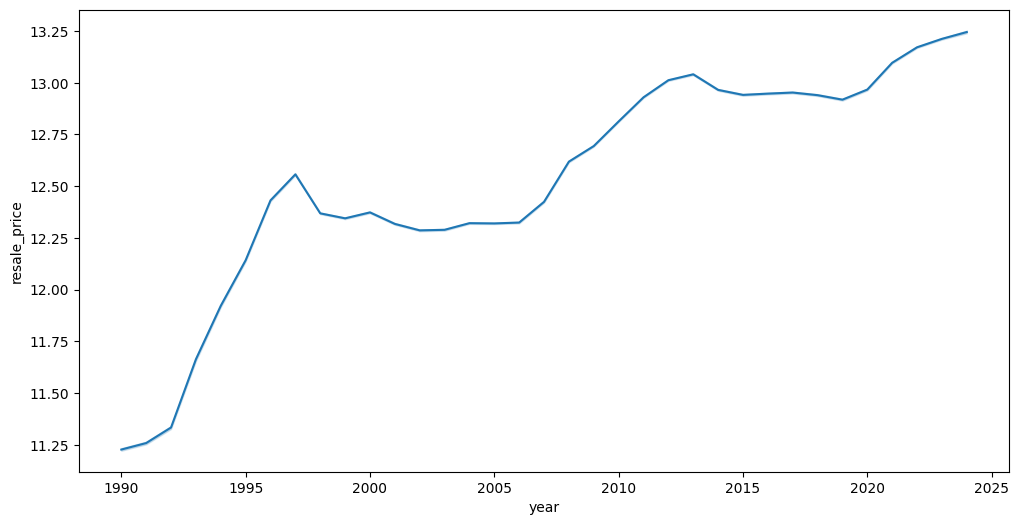

In [46]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'year', y = 'resale_price', data = house_new_data)

<Axes: xlabel='remaining_lease_years', ylabel='resale_price'>

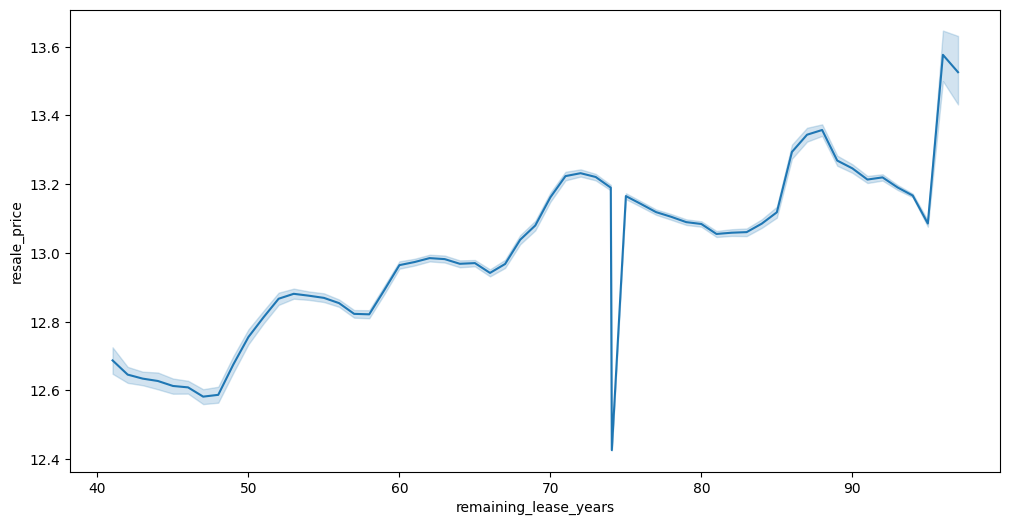

In [47]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'remaining_lease_years' , y = 'resale_price', data = house_new_data)

In [48]:
# dropping the irrelvent feature 
house_new_data1.drop(columns=['block','street_name'],inplace = True)
house_new_data1

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,0,5,3.635067,7,11.018453,1990,1,1977,74.068353,6.533241
1,0,0,2,3.635067,7,11.018453,1990,1,1977,74.068353,6.533241
2,0,0,5,3.635067,7,11.018453,1990,1,1977,74.068353,6.533241
3,0,0,4,3.635067,7,11.018453,1990,1,1977,74.068353,6.533241
4,0,2,2,4.290459,20,11.018453,1990,1,1976,74.068353,6.533241
...,...,...,...,...,...,...,...,...,...,...,...
924442,26,4,5,4.804021,9,13.270783,2014,12,1988,74.068353,6.533241
924443,26,5,5,4.983607,15,13.199324,2014,12,1988,74.068353,6.533241
924444,26,5,4,5.099866,5,13.511699,2014,12,1992,74.068353,6.533241
924445,26,5,4,5.023881,15,13.291262,2014,12,1985,74.068353,6.533241


In [49]:
house_new_data1

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,0,5,3.635067,7,11.018453,1990,1,1977,74.068353,6.533241
1,0,0,2,3.635067,7,11.018453,1990,1,1977,74.068353,6.533241
2,0,0,5,3.635067,7,11.018453,1990,1,1977,74.068353,6.533241
3,0,0,4,3.635067,7,11.018453,1990,1,1977,74.068353,6.533241
4,0,2,2,4.290459,20,11.018453,1990,1,1976,74.068353,6.533241
...,...,...,...,...,...,...,...,...,...,...,...
924442,26,4,5,4.804021,9,13.270783,2014,12,1988,74.068353,6.533241
924443,26,5,5,4.983607,15,13.199324,2014,12,1988,74.068353,6.533241
924444,26,5,4,5.099866,5,13.511699,2014,12,1992,74.068353,6.533241
924445,26,5,4,5.023881,15,13.291262,2014,12,1985,74.068353,6.533241


In [50]:
house_new_data1.dtypes

town                        int32
flat_type                   int32
storey_range                int32
floor_area_sqm            float64
flat_model                  int32
resale_price              float64
year                        int32
month_of_year               int32
lease_commence_year         int32
remaining_lease_years     float64
remaining_lease_months    float64
dtype: object

In [51]:
heat = house_new_data1.corr()
heat

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
town,1.000000,0.137193,-0.047975,0.136372,-0.102826,0.084222,0.072582,0.003112,0.214046,0.083488,0.002804
flat_type,0.137193,1.000000,0.074872,0.940918,-0.360043,0.603826,0.102105,0.003552,0.410209,0.072687,-0.000695
storey_range,-0.047975,0.074872,1.000000,0.050041,-0.068544,0.186558,0.104432,-0.002468,0.165949,0.132904,-0.000966
floor_area_sqm,0.136372,0.940918,0.050041,1.000000,-0.363231,0.601031,0.076495,0.003125,0.424141,0.060493,-0.001246
flat_model,-0.102826,-0.360043,-0.068544,-0.363231,1.000000,-0.181628,0.063644,-0.005001,-0.118451,-0.030001,0.000368
resale_price,0.084222,0.603826,0.186558,0.601031,-0.181628,1.000000,0.687085,0.011462,0.534009,0.084765,0.001134
year,0.072582,0.102105,0.104432,0.076495,0.063644,0.687085,1.000000,-0.023569,0.430557,-0.001285,0.000655
month_of_year,0.003112,0.003552,-0.002468,0.003125,-0.005001,0.011462,-0.023569,1.000000,0.004660,-0.003850,0.007577
lease_commence_year,0.214046,0.410209,0.165949,0.424141,-0.118451,0.534009,0.430557,0.004660,1.000000,0.522451,0.008583
remaining_lease_years,0.083488,0.072687,0.132904,0.060493,-0.030001,0.084765,-0.001285,-0.003850,0.522451,1.000000,-0.002580


<Axes: >

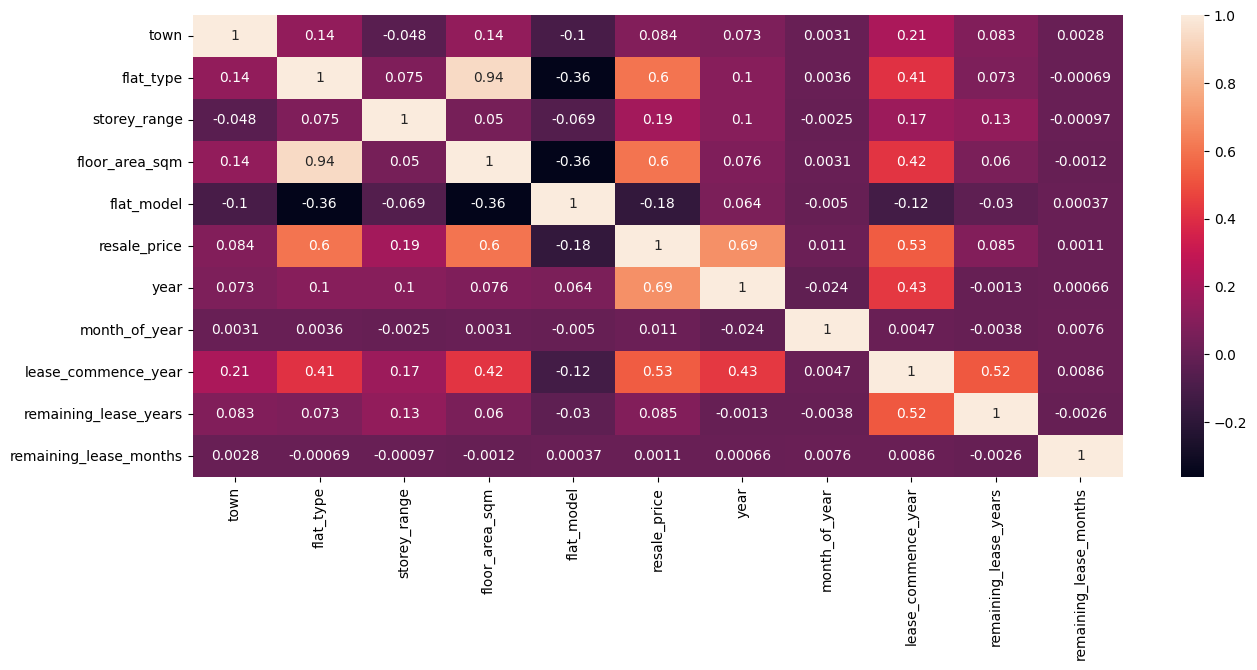

In [52]:
# Need to verify any columns are highly correlated using Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(heat,annot = True)

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

In [54]:
house_new_data1.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'year', 'month_of_year', 'lease_commence_year',
       'remaining_lease_years', 'remaining_lease_months'],
      dtype='object')

In [55]:
x = house_new_data1[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
        'year', 'month_of_year', 'lease_commence_year',
       'remaining_lease_years', 'remaining_lease_months']]
y = house_new_data1[['resale_price']]

In [56]:
#standardize the features of a dataset
encoder = StandardScaler()

encoder.fit_transform(x)

array([[-1.55189507e+00, -3.17440181e+00,  5.97904860e-01, ...,
        -1.05777899e+00, -2.03607810e-14, -8.42531277e-15],
       [-1.55189507e+00, -3.17440181e+00, -5.28945468e-01, ...,
        -1.05777899e+00, -2.03607810e-14, -8.42531277e-15],
       [-1.55189507e+00, -3.17440181e+00,  5.97904860e-01, ...,
        -1.05777899e+00, -2.03607810e-14, -8.42531277e-15],
       ...,
       [ 1.40370358e+00,  2.09159120e+00,  2.22288084e-01, ...,
         3.52894766e-01, -2.03607810e-14, -8.42531277e-15],
       [ 1.40370358e+00,  2.09159120e+00,  2.22288084e-01, ...,
        -3.05419655e-01, -2.03607810e-14, -8.42531277e-15],
       [ 1.40370358e+00,  2.09159120e+00, -5.28945468e-01, ...,
        -3.05419655e-01, -2.03607810e-14, -8.42531277e-15]])

In [57]:
#check the accuracy of training and testing using metrics RandomForestRegressor


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

RFR= RandomForestRegressor(n_estimators= 50 ,random_state = 0)

# fitting the model: 

RFR.fit(x_train,y_train)

y_pred_train = RFR.predict(x_train)
y_pred_test = RFR.predict(x_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

r2_train,r2_test

(0.9959184594506403, 0.9811074436043485)

In [58]:
# we got good accuracy after oversampling
# RandomForestRegressor have good testing accuracy, but in training accuracy is overfitting.
# GridsearchCV is a cross validation function
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

param = {'max_depth'        : [20],
              'min_samples_split': [ 5, ],
              'min_samples_leaf' : [ 2, ],
              'max_features'     : ['log2']}
grid_searchcv = GridSearchCV(RandomForestRegressor(),param_grid = param,  cv = 5)
grid_searchcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20], 'max_features': ['log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [5]})

In [59]:
grid_searchcv.best_score_

0.9745085571682968

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model: 

Hyper_model.fit(x_train,y_train)

y_pred_train = Hyper_model.predict(x_train)
y_pred_test = Hyper_model.predict(x_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

r2_train,r2_test

(0.9806747831350199, 0.9748266958129422)

In [61]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model: 

Hyper_model.fit(x_train,y_train)

y_pred_train = Hyper_model.predict(x_train)
y_pred_test = Hyper_model.predict(x_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 0.008268316434328266
Mean Absolute Error: 0.06638308175790172
Root Mean Squared Error: 0.09093028337318798
0.9751564191363881


In [62]:
# manually passed the user input and predict the selling price

user_data = np.array([[0,1,3,3.785069,5,2017,1,1979,61.000000,4.000000]])
y_prediction = Hyper_model.predict(user_data)
y_prediction[0]

12.304904910996665

In [63]:
user_data = np.array([[4,3,2,4.785069,4,2023,3,1989,69.000000,4.000000]])

y_prediction = Hyper_model.predict(user_data)
y_prediction[0]

13.41112014631798

In [64]:
# using Inverse Log Transformation to convert the value to original re sale price of the data (exp)
np.exp(y_prediction[0])

667383.516103362

In [65]:
# save the regression model by using pickle

with open(r"D:\My files\Nagammai\Guvi\MDE86\code\house_price_model.pkl", 'wb') as f:
    pickle.dump(Hyper_model, f)

In [66]:
# load the model
with open(r"D:\My files\Nagammai\Guvi\MDE86\code\house_price_model.pkl", 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[4, 3, 2, 4.785069, 4, 2023, 3, 1989, 69.000000, 4.000000]])
prediction = model.predict(user_data)
predicted_price = prediction[0]
predicted_price
np.exp(predicted_price)


667383.516103362